# Double 7's Average Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a X-day low, buy.
    3. If the Security closes at a X-day high, sell your long position.
    
    Instead of using a single period like 7 and allocating all of the capital to it,
    the capital is split between the number of periods that will be used,
    for example [5, 6, 7] = 33% each).

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
symbol = 'SPY'
capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'margin' : 2.0,
    'periods' : [5,6,7,8,9],
    'sma' : 70,
    'use_regime_filter' : True,
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options=options)
s.run()

In [6]:
s.ts

,SPY_7_close,SPY_5_close,SPY_9_close,SPY_8_close,SPY_6_close,regime,sma,period_high5,period_low5,period_high6,period_low6,period_high7,period_low7,period_high8,period_low8,period_high9,period_low9
date,,,,,,,,,,,,,,,,,
1993-11-11,46.38,46.38,46.38,46.38,46.38,1.00,46.11,46.50,46.06,46.50,45.84,46.50,45.84,46.94,45.84,46.97,45.84
1993-11-12,46.59,46.59,46.59,46.59,46.59,2.00,46.13,46.59,46.12,46.59,46.06,46.59,45.84,46.59,45.84,46.94,45.84
1993-11-15,46.56,46.56,46.56,46.56,46.56,3.00,46.16,46.59,46.16,46.59,46.12,46.59,46.06,46.59,45.84,46.59,45.84
1993-11-16,46.78,46.78,46.78,46.78,46.78,4.00,46.18,46.78,46.38,46.78,46.16,46.78,46.12,46.78,46.06,46.78,45.84
1993-11-17,46.53,46.53,46.53,46.53,46.53,5.00,46.20,46.78,46.38,46.78,46.38,46.78,46.16,46.78,46.12,46.78,46.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,380.72,380.72,380.72,380.72,380.72,-14.00,382.76,386.23,380.02,389.63,380.02,399.40,380.02,401.97,380.02,401.97,380.02
2022-12-23,382.91,382.91,382.91,382.91,382.91,-15.00,382.66,386.23,380.02,386.23,380.02,389.63,380.02,399.40,380.02,401.97,380.02
2022-12-27,381.40,381.40,381.40,381.40,381.40,-16.00,382.60,386.23,380.54,386.23,380.02,386.23,380.02,389.63,380.02,399.40,380.02


View log DataFrames: raw trade log, trade log, and daily balance

In [7]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1993-11-18,0,46.41,86,entry,LONG,SPY_5
1,1993-11-19,1,46.31,86,entry,LONG,SPY_7
2,1993-11-19,2,46.31,86,entry,LONG,SPY_8
3,1993-11-19,3,46.31,86,entry,LONG,SPY_6
4,1993-11-22,4,46.03,85,entry,LONG,SPY_9


In [8]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
1632,2022-12-06,393.83,2022-12-29,383.44,-10.39,-5298.89,510,498713.44,LONG,SPY_9
1633,2022-12-06,393.83,2022-12-29,383.44,-10.39,-5298.89,510,493414.55,LONG,SPY_8
1634,2022-12-15,389.63,2022-12-29,383.44,-6.19,-3237.37,523,490177.18,LONG,SPY_7
1635,2022-12-15,389.63,2022-12-29,383.44,-6.19,-3237.37,523,486939.81,LONG,SPY_5
1636,2022-12-15,389.63,2022-12-29,383.44,-6.19,-3237.37,523,483702.44,LONG,SPY_6


In [9]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-22,486660.35,486660.35,486660.35,2589,-499023.73,2.03,-
2022-12-23,492330.27,492330.27,492330.27,2589,-499023.73,2.01,-
2022-12-27,488420.85,488420.85,488420.85,2589,-499023.73,2.02,-
2022-12-28,476149.02,476149.02,476149.02,2589,-499023.73,2.05,-
2022-12-29,493702.44,493702.44,493702.44,0,493702.44,1.00,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(s.stats)

start                                                   1993-11-11
end                                                     2022-12-29
beginning_balance                                            10000
ending_balance                                           493702.44
total_net_profit                                         483702.44
gross_profit                                            1193945.09
gross_loss                                              -710242.65
profit_factor                                                 1.68
return_on_initial_capital                                  4837.02
annual_return_rate                                           14.32
trading_period                           29 years 1 months 18 days
pct_time_in_market                                           43.31
margin                                                        2.00
avg_leverage                                                  1.25
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
SPY_7,"$105,195.51",0.20,0.22,1.09
SPY_5,"$106,305.86",0.20,0.22,1.10
SPY_9,"$90,028.86",0.20,0.19,0.93
SPY_8,"$71,468.65",0.20,0.15,0.74
SPY_6,"$110,703.56",0.20,0.23,1.14
TOTAL,"$483,702.44",1.00,1.00,1.00


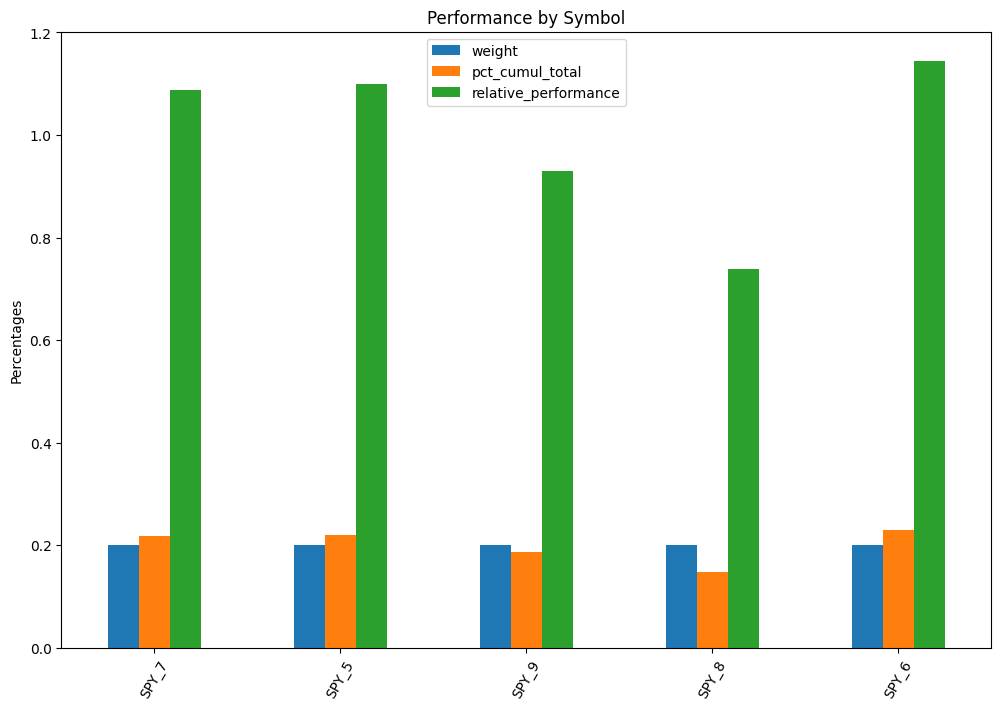

In [11]:
weights = {symbol: 1 / len(s.symbols) for symbol in s.symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,SPY_7,SPY_5,SPY_9,SPY_8,SPY_6
SPY_7,1.00,1.00,1.00,1.00,1.00
SPY_5,1.00,1.00,1.00,1.00,1.00
SPY_9,1.00,1.00,1.00,1.00,1.00
SPY_8,1.00,1.00,1.00,1.00,1.00
SPY_6,1.00,1.00,1.00,1.00,1.00


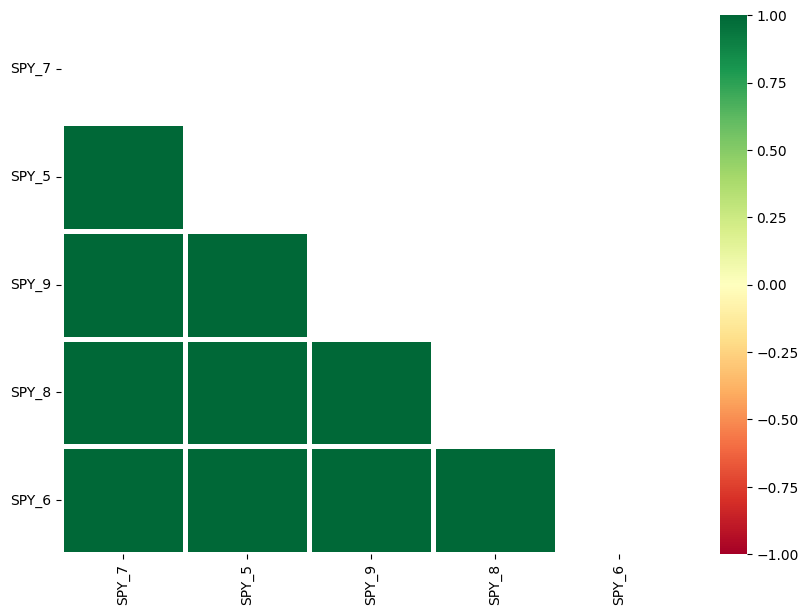

In [12]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [13]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

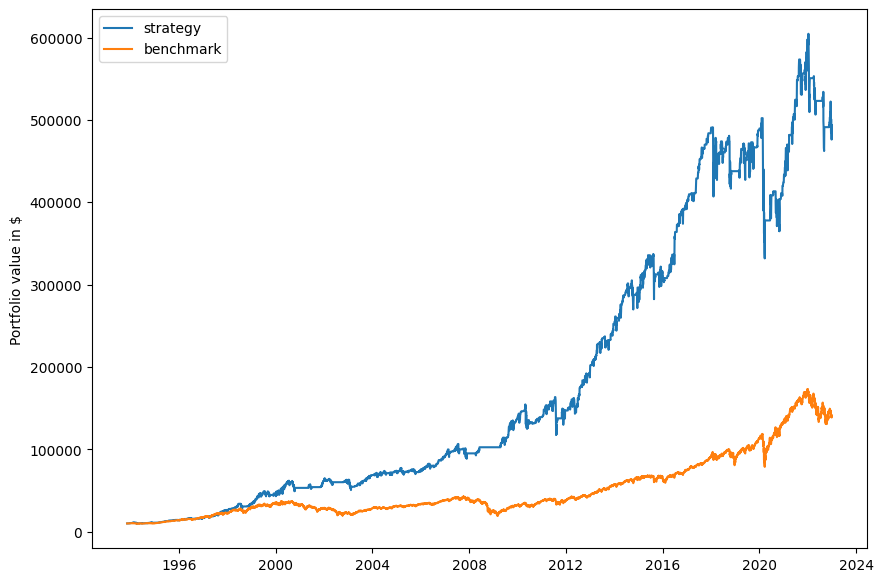

In [14]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,14.32,9.51
max_closed_out_drawdown,-33.92,-55.15
annualized_return_over_max_drawdown,0.42,0.17
best_month,23.98,23.59
worst_month,-32.51,-30.98
sharpe_ratio,0.77,0.57
sortino_ratio,0.64,0.73
monthly_std,4.09,4.56
annual_std,16.91,17.32


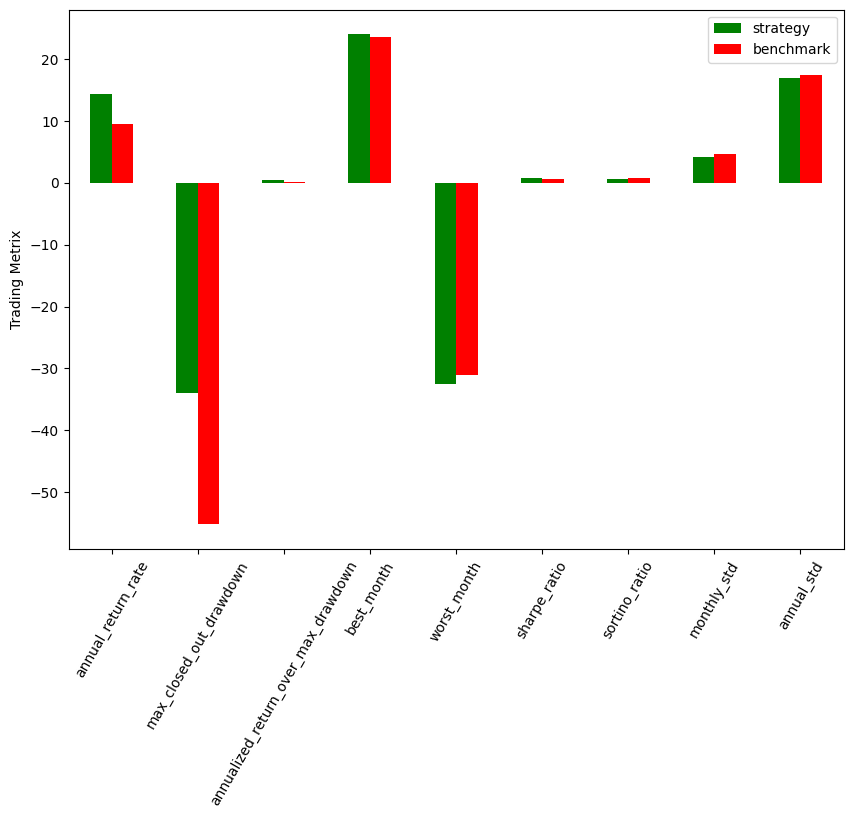

In [15]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [16]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.77
sharpe_ratio_max        0.81
sharpe_ratio_min        0.73
strategy risk           0.17
instrument risk         0.17
optimal target risk     0.77
half kelly criterion    0.39
aggressive leverage     4.46
moderate leverage       2.23
conservative leverage   2.11
dtype: float64